In [1]:
#Importing all the neccessary libraries
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
author_results = pd.read_csv("45_ele.csv")

In [3]:
reproduced_results = pd.read_csv("results_45.csv")

In [4]:
# Some EDA for authors results
author_results = pd.read_csv("45_ele.csv")


# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(author_results.head())

# Display information about the dataframe including data types and non-null values
print("\nInformation about the dataframe:")
print(author_results.info())

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(author_results.describe())

# Check for missing values
print("\nNumber of missing values in each column:")
print(author_results.isnull().sum())


First few rows of the dataframe:
   ACTIVITY                                             smiles
0         0                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1
1         0                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C
2         0                                    CCCC(CCC)C(=O)O
3         0    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C
4         0  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ACTIVITY  44 non-null     int64 
 1   smiles    44 non-null     object
dtypes: int64(1), object(1)
memory usage: 836.0+ bytes
None

Summary statistics of numerical columns:
        ACTIVITY
count  44.000000
mean    0.681818
std     0.471155
min     0.000000
25%     0.000000
50%     1.000000
75%     1.000000
max     1.000000

Number of missing values in each column:
ACTI

In [5]:
# Thus we can see the under the activity column they have classified a molecule as a blockade or non-blockade

In [6]:
# Some EDA for my reproduced results

reproduced_results = pd.read_csv("results_45.csv")

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(reproduced_results.head())

# Display information about the dataframe including data types and non-null values
print("\nInformation about the dataframe:")
print(reproduced_results.info())

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(reproduced_results.describe())

# Check for missing values
print("\nNumber of missing values in each column:")
print(reproduced_results.isnull().sum())

First few rows of the dataframe:
   Predictions                                             smiles
0     0.645569                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1
1     0.088602                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C
2     0.042538                                    CCCC(CCC)C(=O)O
3     0.060436    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C
4     0.038881  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Predictions  44 non-null     float64
 1   smiles       44 non-null     object 
dtypes: float64(1), object(1)
memory usage: 836.0+ bytes
None

Summary statistics of numerical columns:
       Predictions
count    44.000000
mean      0.551497
std       0.323495
min       0.038881
25%       0.245266
50%       0.636519
75%       0.840914
max       0

In [7]:
# I have run the model to obtain the probabilty of a molecule being a blockade or a non blockade
# The publication indicates, if the probability value is less than 0.5, the model classifies it as an hERG non-blocker and vice-versa
# Now, classifying the reults, indicating 1 : blockaed and 0: non-blockade

In [8]:




# Read the CSV file with predicted probabilities into a DataFrame
reproduced_results = pd.read_csv("results_45.csv")

# Classify the molecules based on probability values
# If probability is less than 0.5, classify as non-blockade (0), otherwise classify as blockade (1)
reproduced_results['Activity'] = reproduced_results['Predictions'].apply(lambda x: 0 if x < 0.5 else 1)

# Save the updated DataFrame to a new CSV file
classified_results = "classified_results_45.csv"
reproduced_results.to_csv(classified_results, index=False)

# Display the first few rows of the updated DataFrame
print("First few rows of the classified results:")
print(reproduced_results.head())

# Inform user about the saved CSV file
print(f"Updated DataFrame saved to: {classified_results}")



First few rows of the classified results:
   Predictions                                             smiles  Activity
0     0.645569                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1         1
1     0.088602                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C         0
2     0.042538                                    CCCC(CCC)C(=O)O         0
3     0.060436    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C         0
4     0.038881  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...         0
Updated DataFrame saved to: classified_results_45.csv


In [9]:
# Now,moving on to compare the results obtained by the authors and the results reproduced 
# making a new csv with the name of molecules, publication results and my results

In [10]:

# Load the original publication results and reproduced results CSV files
author_results = pd.read_csv("45_ele.csv")
classified_results = pd.read_csv("classified_results_45.csv")

# Merge the two DataFrames on molecule name
results = pd.merge(author_results, reproduced_results, on='smiles', suffixes=('_publication', '_reproduced'))

# Save the merged DataFrame to a new CSV file
results.to_csv("comparison_results.csv", index=False)

# Display the first few rows of the merged DataFrame
print("First few rows of the comparison results:")
print(results.head())


First few rows of the comparison results:
   ACTIVITY                                             smiles  Predictions  \
0         0                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1     0.645569   
1         0                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C     0.088602   
2         0                                    CCCC(CCC)C(=O)O     0.042538   
3         0    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C     0.060436   
4         0  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...     0.038881   

   Activity  
0         1  
1         0  
2         0  
3         0  
4         0  


In [11]:
# Load the original publication results and reproduced results CSV files
author_results = pd.read_csv("45_ele.csv")
classified_results = pd.read_csv("classified_results_45.csv")

# Merge the two DataFrames on molecule name
results = pd.merge(author_results[['ACTIVITY', 'smiles']], classified_results[['smiles', 'Activity']], on='smiles')

# Rename the 'ACTIVITY' column to 'Activity' from author_results
results.rename(columns={'ACTIVITY': 'Activity_author'}, inplace=True)

# Save the merged DataFrame to a new CSV file
results.to_csv("comparison_results.csv", index=False)

# Display the first few rows of the merged DataFrame
print("First few rows of the comparison results:")
print(results.head())


First few rows of the comparison results:
   Activity_author                                             smiles  \
0                0                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1   
1                0                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C   
2                0                                    CCCC(CCC)C(=O)O   
3                0    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C   
4                0  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...   

   Activity  
0         1  
1         0  
2         0  
3         0  
4         0  


In [12]:
# Here I made a combined csv of classification results for smooth working and exploration

In [13]:


# Read the CSV file into a DataFrame
comparison_results = pd.read_csv("comparison_results.csv")

# Count the number of blockers in the author's classification (Activity_author)
author_blockers_count = comparison_results['Activity_author'].value_counts().get(1, 0)

# Count the number of blockers in your classification (Activity_your)
reproduced_blockers_count = comparison_results['Activity'].value_counts().get(1, 0)

print("Number of blockers in author's classification:", author_blockers_count)
print("Number of blockers in reproduced classification:", reproduced_blockers_count)


Number of blockers in author's classification: 29
Number of blockers in reproduced classification: 27


In [14]:
# This indicates that similar results were not reproduced
# Proceeding withb some graphical visualizations

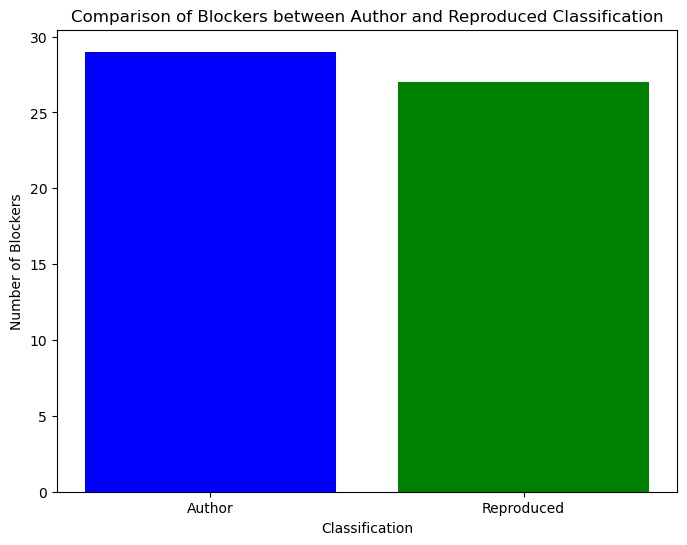

In [15]:
# Bar plot
import matplotlib.pyplot as plt

# Data
classifications = ['Author', 'Reproduced']
blocker_counts = [author_blockers_count, reproduced_blockers_count]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(classifications, blocker_counts, color=['blue', 'green'])
plt.xlabel('Classification')
plt.ylabel('Number of Blockers')
plt.title('Comparison of Blockers between Author and Reproduced Classification')
plt.show()


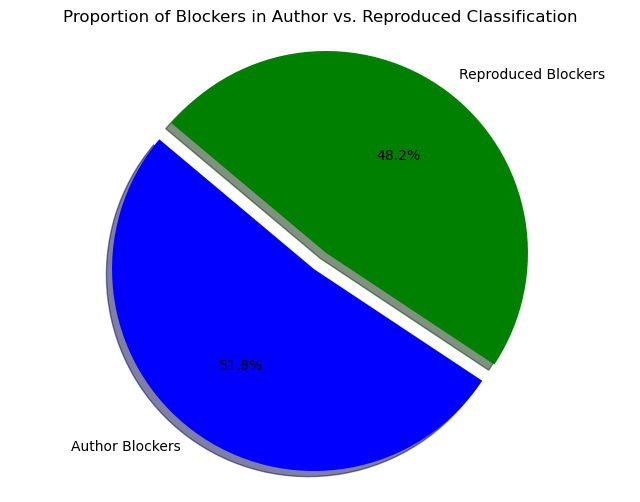

In [16]:
# A pie chart


# Assuming you have counted the number of blockers for both classifications

# Data for the pie chart
labels = ['Author Blockers', 'Reproduced Blockers']
sizes = [author_blockers_count, reproduced_blockers_count]
colors = ['blue', 'green']
explode = (0.1, 0)  # explode the 1st slice (author's classification) for better visibility

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Blockers in Author vs. Reproduced Classification')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


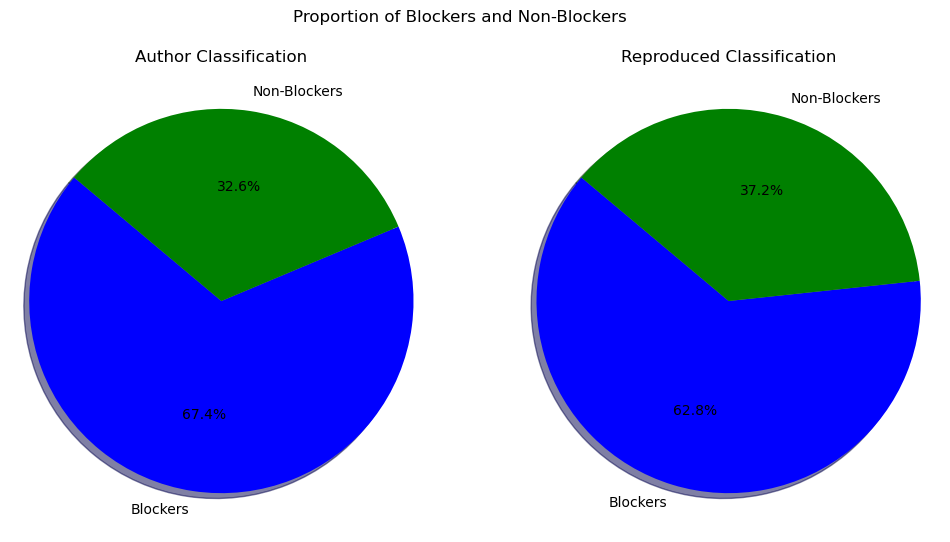

In [17]:
import matplotlib.pyplot as plt

# Assuming you have counted the number of blockers and non-blockades for both classifications

# Data for the pie charts
labels = ['Blockers', 'Non-Blockers']
colors = ['blue', 'green']

# Create subplots for author's classification
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie([author_blockers_count, len(comparison_results) - author_blockers_count],
        labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Author Classification')
plt.axis('equal')

# Create subplots for reproduced classification
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie([reproduced_blockers_count, len(comparison_results) - reproduced_blockers_count],
        labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Reproduced Classification')
plt.axis('equal')

plt.suptitle('Proportion of Blockers and Non-Blockers')
plt.show()


In [24]:
#Loading the results of prediction over the same test sets from Ersilia model eos2at5

eos2ta5_results = pd.read_csv("eos2ta5_res.csv")

print(eos2ta5_results.head(10))




                           key  \
0  XADCESSVHJOZHK-UHFFFAOYSA-N   
1  NNJVILVZKWQKPM-UHFFFAOYSA-N   
2  NIJJYAXOARWZEE-UHFFFAOYSA-N   
3  LORDFXWUHHSAQU-UHFFFAOYSA-N   
4  XZEITPHZKJCCSQ-UHFFFAOYSA-N   
5  IENZQIKPVFGBNW-UHFFFAOYSA-N   
6  YBHILYKTIRIUTE-UHFFFAOYSA-N   
7  BNRNXUUZRGQAQC-UHFFFAOYSA-N   
8  BNRNXUUZRGQAQC-UHFFFAOYSA-N   
9  UTCPYQMSANLUTE-UHFFFAOYSA-N   

                                               input  probability  
0                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1     0.645569  
1                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C     0.088602  
2                                    CCCC(CCC)C(=O)O     0.042538  
3    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C     0.060436  
4  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...     0.038881  
5      COc1cc2nc(nc(N)c2cc1OC)N1CCN(CC1)C(=O)c1ccco1     0.246873  
6            COc1ccc2cc3-c4cc5OCOc5cc4CC[n+]3cc2c1OC     0.589215  
7  CCCc1nn(C)c2c(=O)[nH]c(nc12)c3cc(ccc3OCC)S(=O)...     0.043566  
8  CCCc1nn(C)

In [27]:
#Classifying these into blocaker and non-blocker and counting the number
import pandas as pd

eos2ta5_results = pd.read_csv("eos2ta5_res.csv")

# Classify inputs into blockers (1) and non-blockers (0) based on probability threshold
eos2ta5_results['classification'] = eos2ta5_results['probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# Save the DataFrame back to the CSV file with the added 'classification' column
eos2ta5_results.to_csv("eos2ta5_res_with_classification.csv", index=False)

# Print the updated DataFrame
print(eos2ta5_results.head(10))

# Count the number of blockers
num_blockers = df['classification'].sum()

print("Number of blockers:", num_blockers)



                           key  \
0  XADCESSVHJOZHK-UHFFFAOYSA-N   
1  NNJVILVZKWQKPM-UHFFFAOYSA-N   
2  NIJJYAXOARWZEE-UHFFFAOYSA-N   
3  LORDFXWUHHSAQU-UHFFFAOYSA-N   
4  XZEITPHZKJCCSQ-UHFFFAOYSA-N   
5  IENZQIKPVFGBNW-UHFFFAOYSA-N   
6  YBHILYKTIRIUTE-UHFFFAOYSA-N   
7  BNRNXUUZRGQAQC-UHFFFAOYSA-N   
8  BNRNXUUZRGQAQC-UHFFFAOYSA-N   
9  UTCPYQMSANLUTE-UHFFFAOYSA-N   

                                               input  probability  \
0                      CCOC(=O)C1(CCN(C)CC1)c1ccccc1     0.645569   
1                      CCN(CC)CC(=O)NC1=C(C)C=CC=C1C     0.088602   
2                                    CCCC(CCC)C(=O)O     0.042538   
3    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C     0.060436   
4  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...     0.038881   
5      COc1cc2nc(nc(N)c2cc1OC)N1CCN(CC1)C(=O)c1ccco1     0.246873   
6            COc1ccc2cc3-c4cc5OCOc5cc4CC[n+]3cc2c1OC     0.589215   
7  CCCc1nn(C)c2c(=O)[nH]c(nc12)c3cc(ccc3OCC)S(=O)...     0.043566   
8  C

In [ ]:
#In the above block of code we found the authors couls classify 29 molecules as blockers
# On reproducing the results I could classify 27 blockers
# Using the test set - I dataset on DERsilia eos2ta5 gave 28 blockers

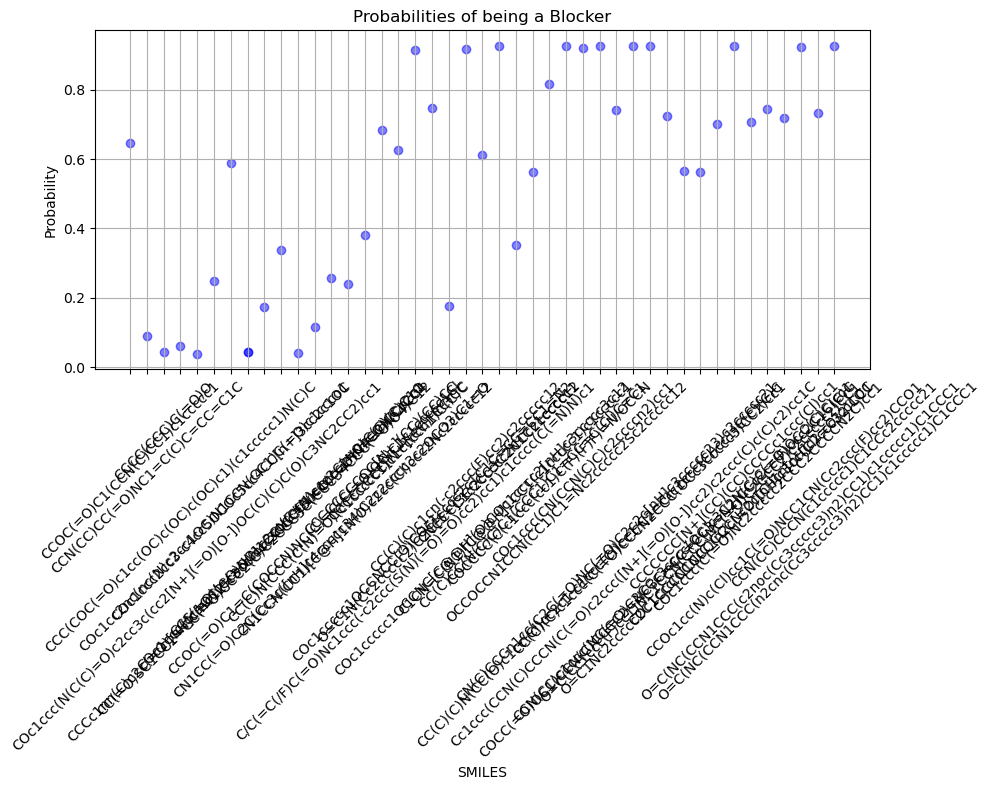

In [36]:
#Scatter plots on predictions of Ersilia model eos2ta5 on test set -I


eos2ta5_results = pd.read_csv("eos2ta5_res.csv")


plt.figure(figsize=(10, 8))
plt.scatter(eos2ta5_results['input'], eos2ta5_results['probability'], color='blue', alpha=0.5)
plt.title('Probabilities of being a Blocker')
plt.xlabel('SMILES')
plt.ylabel('Probability')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()


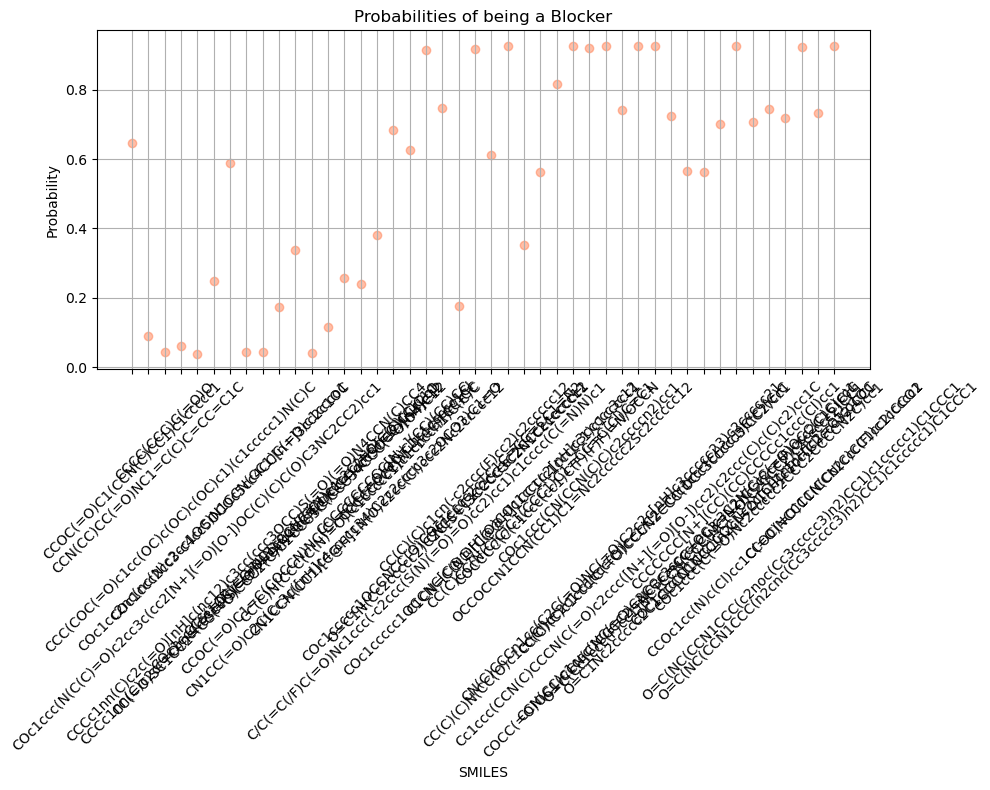

In [42]:
#Scatter plots on predictions of Authors model on test set -I


testsetI = pd.read_csv("results_45.csv")


plt.figure(figsize=(10, 8))
plt.scatter(testsetI['smiles'], testsetI['Predictions'], color='coral', alpha=0.5)
plt.title('Probabilities of being a Blocker')
plt.xlabel('SMILES')
plt.ylabel('Probability')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

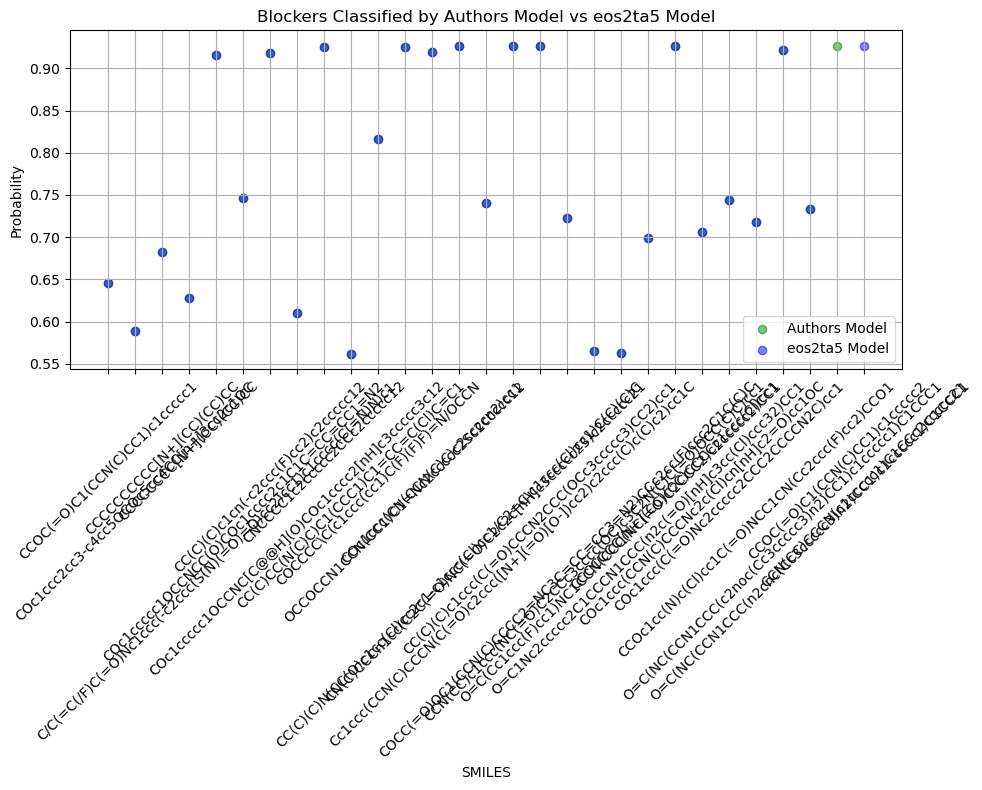

In [50]:
# Scatter plot showing the blockers classified from both the models 
# Authors model : Green
# eos2ta5 model : Blue



# Read the CSV files into DataFrames
testsetI = pd.read_csv("results_45.csv")
eos2ta5_results = pd.read_csv("eos2ta5_res.csv")

# Classify inputs into blockers (1) and non-blockers (0) based on probability threshold
testsetI['classification'] = testsetI['Predictions'].apply(lambda x: 1 if x >= 0.5 else 0)
eos2ta5_results['classification'] = eos2ta5_results['probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# Filter out the blockers classified by each model
testsetI = testsetI[testsetI['classification'] == 1]
eos2ta5_blockers = eos2ta5_results[eos2ta5_results['classification'] == 1]

# Scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for Authors model (Green)
plt.scatter(testsetI['smiles'], testsetI['Predictions'], color='green', label='Authors Model', alpha=0.5)

# Scatter plot for eos2ta5 model (Blue)
plt.scatter(eos2ta5_blockers['input'], eos2ta5_blockers['probability'], color='blue', label='eos2ta5 Model', alpha=0.5)

plt.title('Blockers Classified by Authors Model vs eos2ta5 Model')
plt.xlabel('SMILES')
plt.ylabel('Probability')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
#Thus we can see that one molecule out of 29 molecules that eos2ta5 did not classify as it classifies 28 molecules 